# DSIR Code Challenge
### Christopher Messier

## Part 1

### Step 1: Import the packages

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### Step 2: Read in the data

_Note: One thing I think would help people think like data scientists would be to provide some background for the data that is being used. Not only does it provide context, but it can also present various sources of where one can find data to practice with._


In this lesson, we'll be looking at marketing data from a bank in Portugal to determine whether a customer will sign up for a term deposit account.
The data source can be found [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).
The data used in this excercise is from the [University of California Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), a collection of datasets for machine learning tasks.
This is an excellent source if you would want to practice using the models we present throughout the course.

_Fun fact: I used this data to write one of my (forthcoming...) blog posts!_

In [2]:
! ls  # use ls to see the contents of the directory

README.md                 bank-names.txt            dsir-code-challenge.ipynb
bank-full.csv             coding-challenge.md


In [3]:
df = pd.read_csv('bank-full.csv')  # read in the data from bank-full.csv

In [4]:
df.head()  # take a quick look at the data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


#### _Uh oh..._

That doesn't look right.
What you'll notice is that the items in the rows aren't separated by a comma ( `,` ), as they usaually are.
Instead we see that they are separated with a semi-colon ( `;` ).
We refer to the characters separating the fields of fields of an an array as _"delimiters"_.
To get `pandas` to read the data in properly, we'll have to specify that the delimiter is a semi-colon.

In [5]:
df = pd.read_csv('bank-full.csv', delimiter=';')  # specifying that the delimiter is a semi-colon

In [6]:
df.head()  # that looks better!

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Step 3: Exploratory Data Analysis

Now that we have our data read in, and assigned to the variable `df`, it's time to take a look at our data.
In general, this process is referred to as __Exploratory Data Analysis (EDA)__ (shout out to [John Tukey](https://en.wikipedia.org/wiki/John_Tukey)).
The purpose of this process is to understand how our data is organized.
This is important, because it allows you to account for problems with our data -- and correct those problems! -- before we try to feed it into a model.
The following cells will walk you through this process.

#### Step 3a: Read the data dictionary

If you're lucky, your data will come with a data dictionary.
A data dictionary is generally a text file that describes what the data looks like.
It will identify the fields, the values that are in that field, and may include some summary statistics.
We're lucky enough to have one here, found in `bank-names.txt`.
You can open it and take a look, but I was also nice enough to copy it below.

##### Input variables:
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","bluecollar","selfemployed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):
1. y - has the client subscribed a term deposit? (binary: "yes","no")

#### Step 3b: Data Hygiene

__Data Hygiene__ is the process of cleaning your data, and verfiying that everything looks right.

To do this, we'll:
- check the data types
- look for missing values
- remove duplicates

We'll start by looking at the data types.

In [7]:
df.dtypes  # check the type of the columns in our data

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In our data we have 2 data types:
1. `int64`
2. `object`

Comparing the output from `df.dtypes`, the variables match with what's in the data dictionary.
There does appear to be a problem though; the fields that are supposed to be "binary" are currently strings of "yes" and "no": we'll have to fix this.
For most of the models we will be using, the data must be numeric values, but `object` refers to strings.

We can quickly change the `'yes'` and `'no'` strings to `1`, and `0` using the `.replace()` method.

In [8]:
df = df.replace('yes', 1)  # replace values of 'yes' with 1
df = df.replace('no', 0)  # replace values of 'no' with 0

Let's check our data types again.

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

Using `replace()` corrected the data types of our binary variables.
There are still some `object` variables in there though.
For this data we know this means that they are __categorical__ variables.
We'll keep this in the back of our mind as we move forward. 

We'll also want to see how large our dataset is.

In [10]:
df.shape  # get the shape of the dataframe

(45211, 17)

_Note: `df.shape` is a 2-tuple where the first value is the number of rows, and the second is the number of columns._

A common problem we'll face when working with real-world data is having missing values.

In [11]:
df.isnull().sum()  # check for the number of null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

To quickly explain what the code above is doing; the method `.isnull()` returns a boolean for each value in the dataframe: `True` if it's a null value, and `False` if it isn't.
From this, running the method `.sum()` will then sum all of those values.
Remember, `True` is 1, and `False` is 0; so this will give us a count of missing values.
To return a percent of missing values, use the following code instead.

In [12]:
df.isnull().sum() / df.shape[0]  # get the percent of missing values

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

#### Step 3c: Numeric EDA

Now that we've confirmed that there are no missing values, while noting that several of our variables are categorical.
The next step is to get a numeric summary of our data, generally in the form of __summary statistics__.
Summary statistics describe our data by giving us the following values for each variable:
- count: the number of observations
- mean: the average of the observations
- standard deviation: how "spread out" the values are
- min: the lowest observed value
- median: the value of the "middle" observation
- max: the largest observed value

Luckily, there is a simple pandas method to do this for us: `.describe()`


In [13]:
df.describe()  # get descriptive statistics for the data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


From the summary statistics, we can begin to get a sense of how our data are distributed.
Something is missing though.
It seems that `.describe()` left out our categorical variables!
The reason for this is kind of obvious.
If we look at the `job` feature, we can't find the 'average' job.
To get around this, we'll pass the argument `include='all'` to `.describe()`

In [14]:
df.describe(include='all')  # get descriptive statistics for categorical data as well

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000
unique,NaN,12,3,4,NaN,NaN,NaN,NaN,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,9732,27214,23202,NaN,NaN,NaN,NaN,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936210,NaN,NaN,NaN,0.018027,1362.272058,0.555838,0.160226,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,0.116985
std,10.618762,NaN,NaN,NaN,0.133049,3044.765829,0.496878,0.366820,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,0.321406
min,18.000000,NaN,NaN,NaN,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,0.000000,72.000000,0.000000,0.000000,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,0.000000,448.000000,1.000000,0.000000,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,0.000000,1428.000000,1.000000,0.000000,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,0.000000


For the categorical variables we can see the number of unique values, the most frequent of these values, and the frequency of this category.
You'll also notice that it only does this for the categorical variables, not the numeric variables; just as it only gets the numeric statistics for numerical data.

#### Step 3d: Graphical EDA

Now that we have a numeric sense of our data we know all there is to know, right?

_Wrong!_

No matter how mathematically savy a person is, just seeing the summary statistics for a data set is never enough.
What we need to do is _see_ our data.
To do this, we need to plot it.
Luckily, there is a simple way for us to do this: `sns.pairplot()`

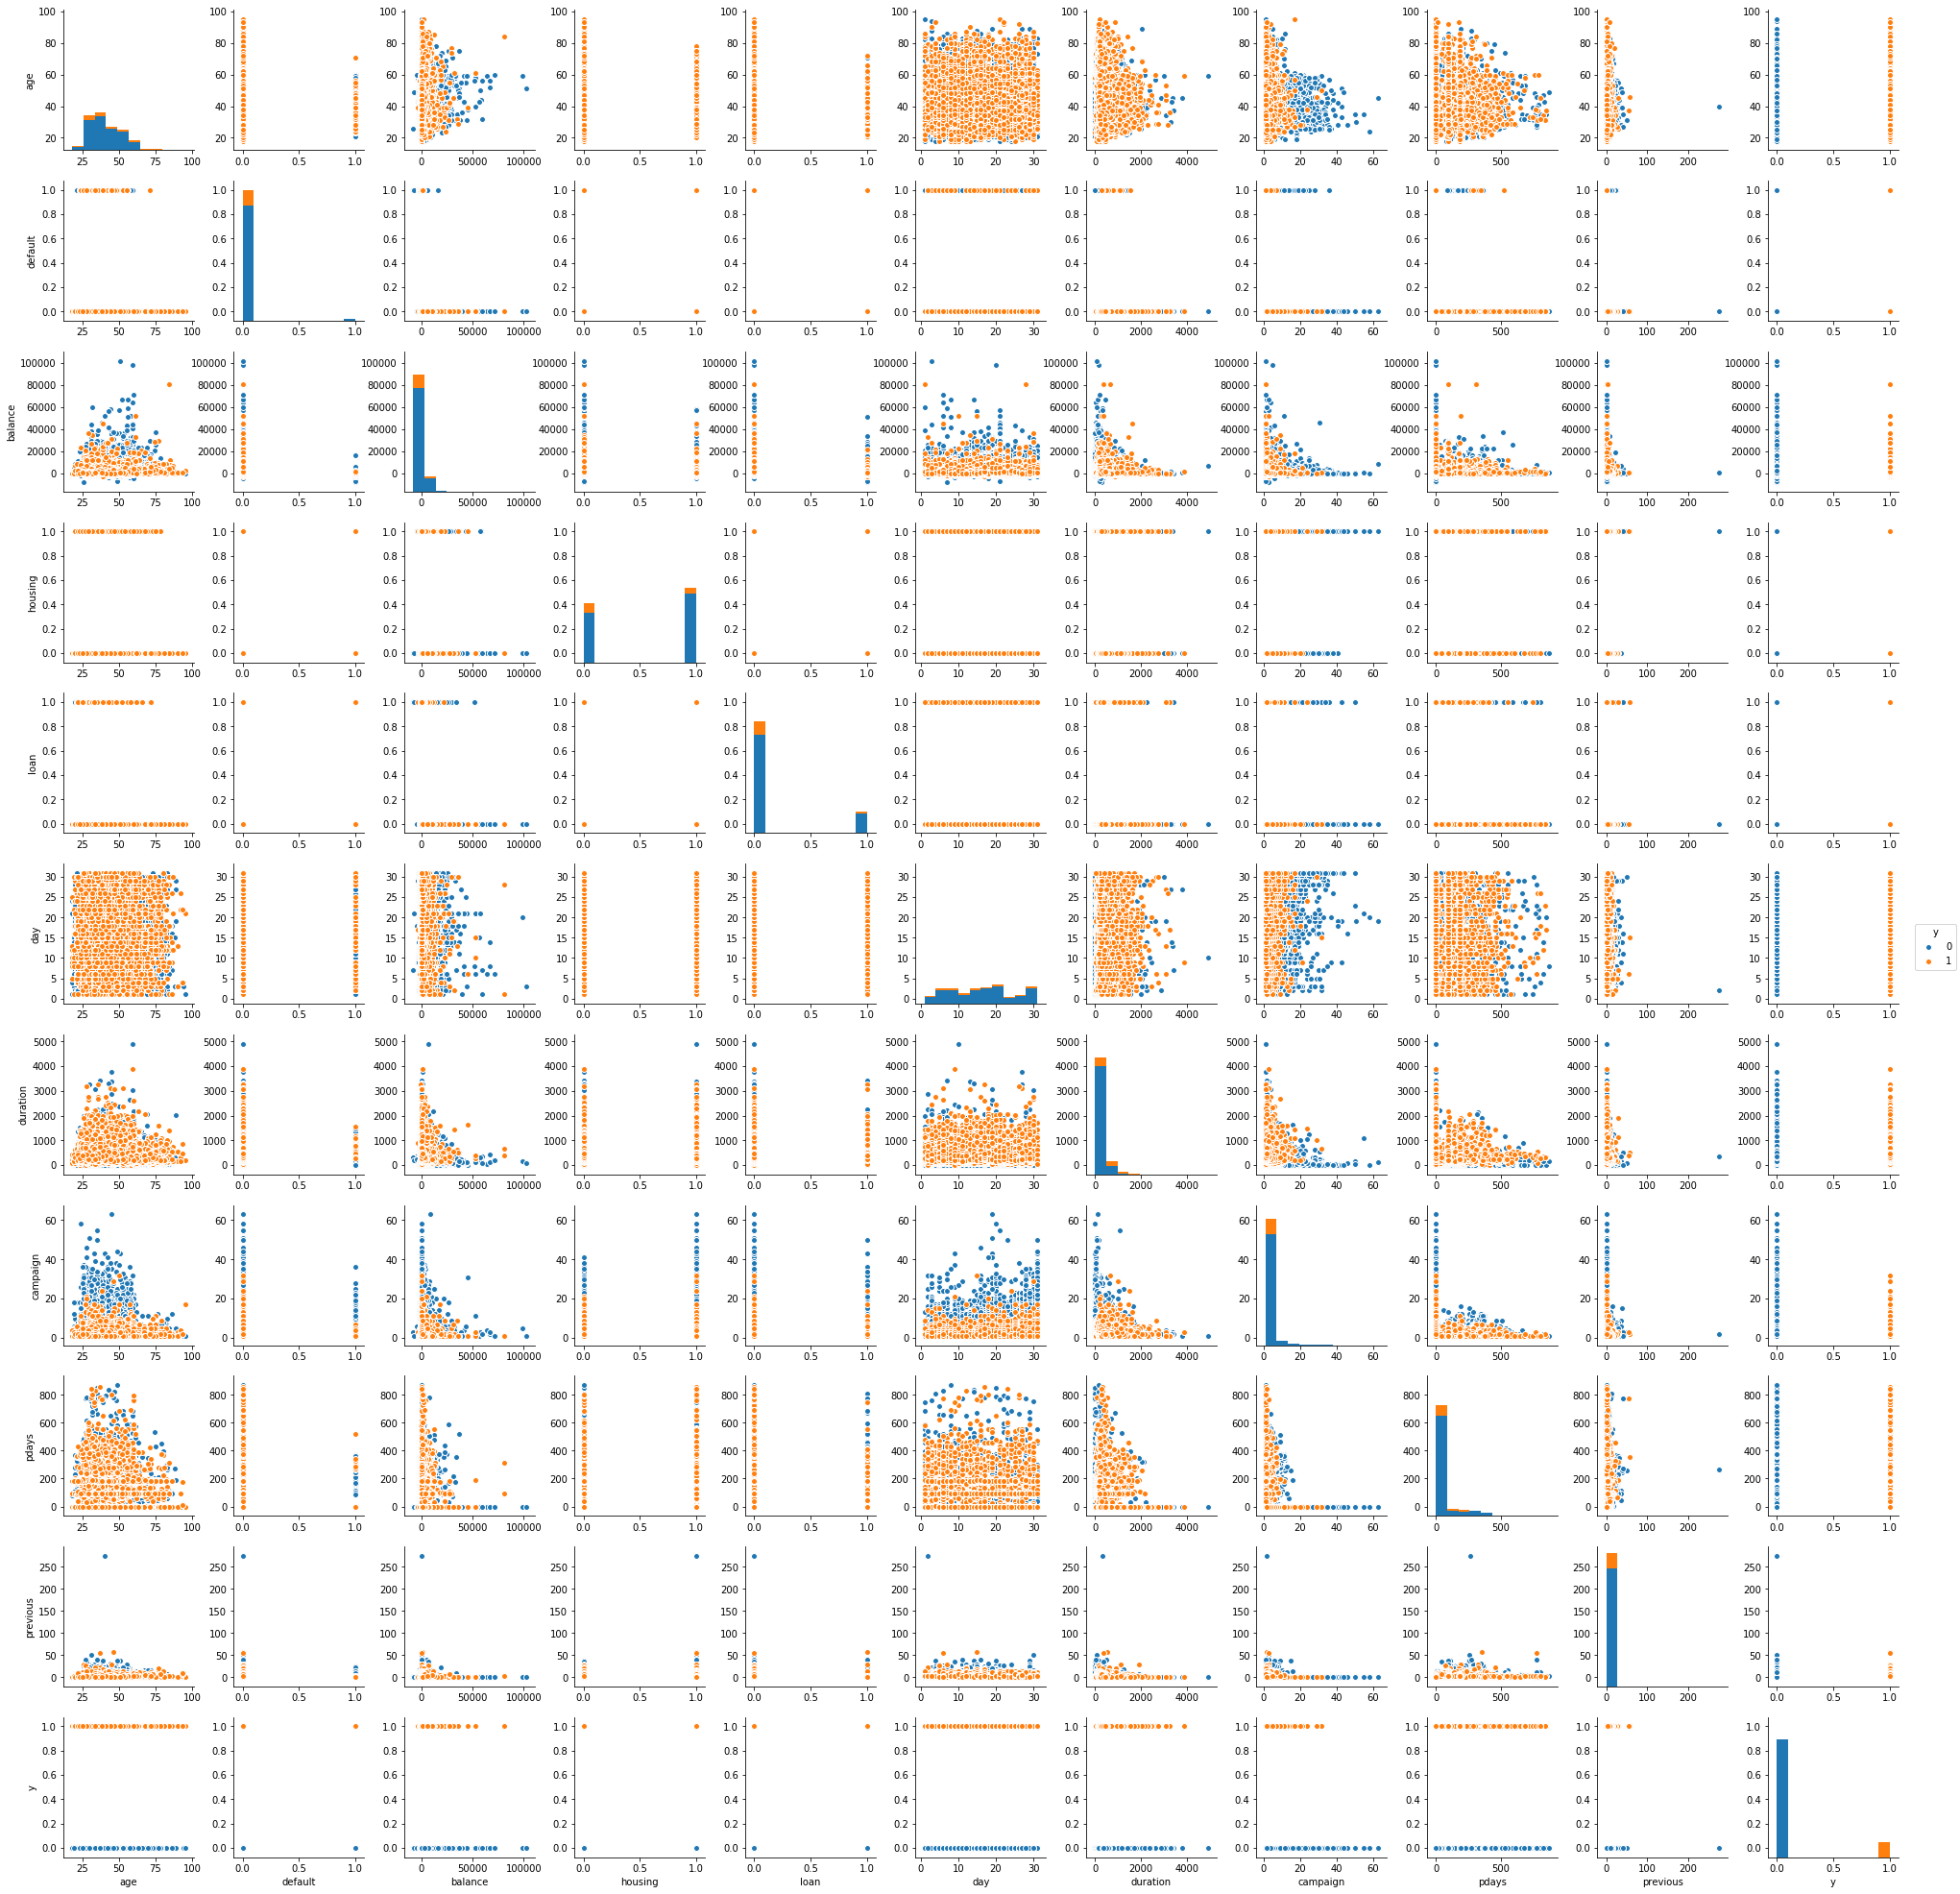

In [15]:
sns.pairplot(df, hue='y');  # create pairplots for the variables, vary colors for y

Pairplot allows us to intuitively "see" the relations in our data, by plotting the variables against one another.
Here each column and each row correspond to a variable.
Each cell in the grid shows the relation between the variable in that row, with the variable in that column.

You'll notice there are two types of plots.
The plots along the diagonal, where the row and column variables are the same, show a histogram of the variable.
This helps you get a sense of the variable's distribution.
Every other plot shows the relationship between the row and column variables, with the row variable being on the vertical axis, and the column variable on the horizontal axis.
This lets you see how one variable changes as the other changes.
For example, look at cell (7,3) to see the relation between a customer's balance (on the horizontal) and the duration (on the vertical).
There is a clear relationship between the two.
As the customer's balance goes up, the duration goes down; but at low balances, the duration goes really.
More specifically, it looks like the relationship is approximately:
$$ \text{duration} = \text{balance}^{-2} = \frac{1}{\text{balance}^{2}}$$
Compare this to cell (1,6), the relation between day, and age.
The values spread out uniformly suggest that there is no correlation between the two.

The human visual cortex is the most complex pattern recognition software in the universe (_for now..._).
Actually looking at your data is a great way to begin to understand the relationships that exist within your data.

#### Step 4: Age differences between subscribers

In [16]:
subscribed = df[df['y'] == 1]  # get subset of observations where the customer subscribed
not_subscribed = df[df['y'] == 0]  # get seubset of observations where the customer did not subscribe

In [17]:
subscribed.head();  # glance at subscribers

In [18]:
not_subscribed.head();  # glance at the non_subscribed

In [19]:
median_age_subscribed = sp.median(subscribed['age'])  # get median age of subscribers
mean_age_subscribed = np.mean(subscribed['age'])  # get mean age of subscribers

print(f"Median age of those who subscribed: {median_age_subscribed:.2f}")
print(f"Mean age of those who subscribed: {mean_age_subscribed:.2f}")

Median age of those who subscribed: 38.00
Mean age of those who subscribed: 41.67


In [20]:
median_age_not_subscribed = sp.median(not_subscribed['age'])  # get median age of non-subscribers
mean_age_not_subscribed = np.mean(not_subscribed['age'])  # get mean age of non-subscribers

print(f"Median age of those who did not subscribe: {median_age_not_subscribed:.2f}")
print(f"Mean age of those who did not subscribe: {mean_age_not_subscribed:.2f}")

Median age of those who did not subscribe: 39.00
Mean age of those who did not subscribe: 40.84


#### Step 4b: Analysis

Looking at the data, there is a difference in the median and mean age for both the customers who subscribed, and did not subscribe.
For those that subscribed the mean age was approximatley 41.67 years old, while the median age was 38 years.
For thos that did not subscribe the mean age was approximatley 40.84 years old, while the median age was 39 years.
To find these values, I first subsetted the dataframe, using the values of the response variable `y`.
Then, using these subsets, I calulated the mean using the function `mean()` from the `numpy` package, and the median using the `median()` function from the `scipy` package (there is no median function in `numpy`).
Just seeing that there is a difference isn't enough though.

One measure that will help to test if there is a difference between the mean and median in the distribution of a variable is the __skew__.
The skew tells us if there is greater mass in one tail of the distribution than the other.
If the skew value is greater than 0, it means that there is more mass in the right tail, and thus that the mean is greater than the median.
If the skew is less than 0, the mean is less than the median.

In [21]:
skew_subscribed = sp.stats.skew(subscribed['age'])  # get the skew score for the age of those subscribed
print(f"Skew for subscribed age: {skew_subscribed:.4f}")  # 

Skew for subscribed age: 0.8668


In [22]:
skew_not_subscribed = sp.stats.skew(not_subscribed['age'])  # get the skew score for the age of those subscribed
print(f"Skew for not subscribed age: {skew_not_subscribed:.4f}")

Skew for not subscribed age: 0.5920


The greater the absolute value of the skew, the greater the difference between the mean and median.
Showing that the distribution of the variable isn't incredibly important though.
As data scientists, the question we need to ask is the difference is _significant_.
This question doesn't make sense for the median and mean though, as the mean and median are two parameters that describe the same distribution.
What we should be interested in is the difference in means _between_ the two groups.
To do this, we should use a $t$-test.

First we set our hypotheses:
$$H_{0}: \mu_{\textit{subscribed}} = \mu_{\textit{not subscribed}}$$
$$H_{1}: \mu_{\textit{subscribed}} \neq \mu_{\textit{not subscribed}}$$

Then we conduct our $t$-test using the `scipy` function, `stats.ttest_ind()`, passing in the two arrays of the ages.

In [23]:
t = sp.stats.ttest_ind(not_subscribed['age'], subscribed['age'])  # conduct t-test on the ages of the two groups
print(f"t: {t[0]:.4f}, p: {t[1]:.4f}")

t: -5.3503, p: 0.0000


With a $t$ statistic of 5.35, we can reject the null-hypothesis $H_{0}$, that the mean age of those who subscribed, and those who did not subscribe were the same.
There is a statistically significant difference in the ages of those who subscribed, and those who did not. 

### Bootstrap Function

In [24]:
import numpy as np
import pandas as pd


def bootstap(df, n=100, to_df=True):  # TODO (@messiest) add balanced=True argument
    """
    generate n bootstrap samples from a DataFrame
    
    param:df: pandas DataFrame
    param:n=100: integer number of samples
    
    return:result: DataFrame of bootstrapped samples
    """
    assert isinstance(df, type(pd.DataFrame())),\
        f"Expected pandas.DataFrame, got type: {type(df)}"
    
    sample = {column: np.random.choice(df[column], size=n) for column in df.columns}  # column: bootstrap sample
    
    if to_df: sample = pd.DataFrame.from_dict(sample)   # convert to DataFrame
    
    return sample


boot = bootstap(df, to_df=True)

In [25]:
boot.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous,y
0,33,616,2,unknown,12,0,150,secondary,0,management,1,divorced,jun,-1,unknown,0,0
1,29,1832,4,cellular,7,0,613,secondary,0,management,0,married,may,-1,failure,0,0
2,57,1093,1,cellular,29,0,59,secondary,1,technician,0,single,jun,93,unknown,0,0
3,50,0,1,unknown,13,0,107,tertiary,0,admin.,0,married,jul,-1,unknown,3,0
4,59,152,2,cellular,17,0,171,primary,1,blue-collar,0,married,nov,-1,unknown,0,0


In [26]:
# sns.pairplot(boot, hue='y')

### Step 5: Variables of Interest

Which of the different _predictor_ variables $X$ affects our _response_ variable $y$?
How do we go about choosing our predictors?

In order to do choose, let's look at our pairplots.
(plotted again for convenience)

In [27]:
# sns.pairplot(df, hue='y')


Focusing on the bottom row, we are able to see the how subscriptions interact with the various predictor variables.
To locate potential variables of interest, look for variables that show more on one side of the plot than the other.
There seem to be two variables that could be of interest here. The first is the `campaign` variable, and the second is the `balance` variable.
In both of these, the orange points seem to be clumped more toward the left of the plots, meaning that those who have lower balances, and weren't in the campaign as long.
Let's take a closer look at them.

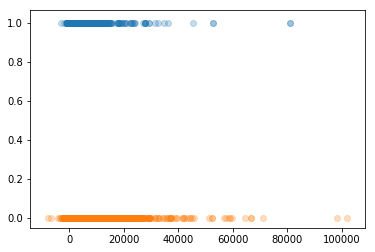

In [28]:
y_sub = subscribed['y'].apply(np.int64) 

plt.scatter(subscribed['balance'], y_sub, alpha=0.25);
plt.scatter(not_subscribed['balance'], not_subscribed['y'], alpha=0.25);

We can see that the subscribed values, on top, seem to carry lower balances than those who didn't.
It's still not abundently clear what the distributions are though.
We can better see this using a __violin plot__.

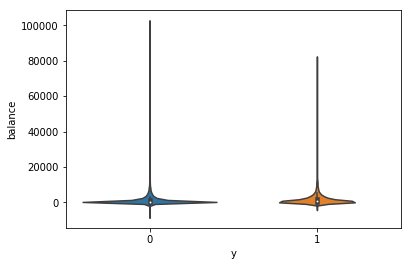

In [29]:
sns.violinplot(x='y', y='balance', data=df, whis=.9)  # plot violin plot for balance


There are some serious outliers though, so let's ignore them, and zoom in on the bulk of our distribution, in the $(-2500 , 10000)$ range.

(-2500, 10000)

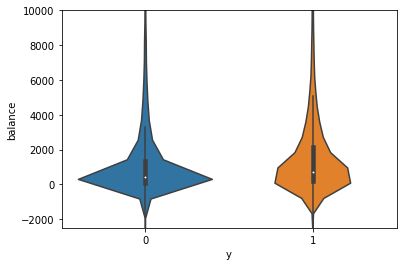

In [30]:
sns.violinplot(x='y', y='balance', data=df, whis=.9)  # plot violin plot for balance
plt.ylim(-2500, 10000)  # ignore outliers for plot

From a quick glance, it appears that those who subscribed, the plot on the right, had higher account balances than those who did not subscribe.

Now let's take a look at the `campaign` predictor.

(0, 10)

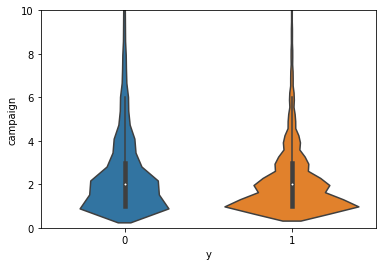

In [31]:
sns.violinplot(x='y', y='campaign', data=df, whis=.9)  # plot violin plot for campaign
plt.ylim(0, 10)  # ignore outliers for plot

It looks like the customers who subscribed tended to be in the campaign a shorter amount of time.
This makes sense though, as the customers who subscribe, are most likely no longer going to be advertised to after they've subscribed.
So while the length of the campaign may be shorter for those who subscribe, then those who don't, the cause and effect is most likely in the other direction. 

## Step 6: Get Dum

_Wait, there's more!_

Now that we have found one numerical variable of interest, we need to return to our categorical variables.
What we need to do is convert our categorical variables into __dummy variables__.

Dummy variables are a sets of binary observations, that are used to represent categorical variables.
For example, we could represent `yes` and `no` votes as a series of `1`s and `0`s for each vote, respectively.

In [32]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [33]:
dummies = df.select_dtypes(object)
dummies.dtypes

job          object
marital      object
education    object
contact      object
month        object
poutcome     object
dtype: object

Think about `yes` and `no` again.
Notice how a `1` or `0` represents both `yes` _and_ `no`.
A vote can either by `yes` or a `no`, but not both.
This is refered to as mutual exclusivity, and all dummy variables have it.
Given $k$ categories, you will use dummy variables to represent $k-1$ of them.

To account for this, we drop one of the variables when we construct the dummies.
We'll do this by passing `drop_firt=True` to the `pandas.get_dummies()` function.
The dummy that was dropped becomes the __baseline comparison__.

In [34]:
dummies = pd.get_dummies(dummies, drop_first=True)  # get dummy variables, droping first of each

The final step is concatanating it back onto the original data frame.

In [35]:
features = pd.concat([df, dummies], axis=1)  # concatenate the dummie variables onto the original data frame

In [36]:
features.head()  # glance at our new DataFrame

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,0,0,1,0,0,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1


### Step 7: Data Prep

Before we can run any models, we need to prepare our data to get it in the proper form.
We've already transformed our categorical variables into dummy variables, giving us numeric representations of these variables.
To get our data ready, first we need to we need to select only the numeric features, and separate the response from our predictors.

In [37]:
X = features.select_dtypes(np.number)  # only use the numeric features 
y = X.pop('y')  # remove the tagged response variable from the features

Now that we have our $X$ (our predictors) and $y$ (our response) variables, we need to divide the data into __train__ and __test__ sets.
This is important, because we need to ensure that we aren't testing our model on the same data that we're using to train it.
To do this, we'll use the `train_test_split` function from `sklearn.model_selection`.

In [38]:
from sklearn.model_selection import train_test_split

x_trian, x_test, y_train, y_test = train_test_split(X, y, random_state=42)  # divide the data in to training and test sets

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### Step 8: Build Models

Our data is cleaned and we've separated our training and test sets, let's get to modelling!

_Slow down..._

Before we can build a model, we need to think about the question we're attempting to answer.
We're tasked with identifying whether a customer will _subscribe_ or _not subscribe_.
This is what's known as a __binary classification__ problem.
Given our $X$ values, we want to determine whether a customer subscribes $y=1$, or does not subscribe $y=0$.
This informs the type of models that we use.

There are additional considerations that we need to account for when we select our model.
Is this an __inference__ or a __prediction__ task?
The difference is that for inference, the goal is to determine the impact of each $X$ variable on the classification of $y$.
This means that we need a model that has _interpretable_ results.
For prediction we don't need to be able to interpret the role of each $X$ variable, we simply need the most accurate predictions possible.
In order to work in both of context, we're going to use two models to analyze our data: a __Logistic Regrssion__, and a __Random Forest Classifier__.


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

#### Logistic Regression

Logistic Regression is an example of a _generalized linear model_.
This class of models uses the simplicity of a linear model $y = \beta_{0} + \beta_{1}x_{1} + \cdots + \beta{p}x_{p}$, but transforms them in order to apply it to tasks like classification.

While you could concievably use a linear regression to classify binary data, there are problems with this application.
Among these are that your errors won't be normally distributed, but will follow a Bernoulli distributed; also, the estimates that a line will give, interpretted as the probabilities of an observation belonging to each class,  violate probability theory, as there will be predictions great than $1$, and less than $0$.
The transformation that is used in logistic regression corrects for this, bounding the predictions between 0 and one, and handling the errors appropriately.
There are still assumptions that must be made, however; our model must be linear in the logit, meaning that the model that gets transformed is linear, and that the transformation is affine, and strictly monotonic, meaning that the transformation preserves the ordering of $p(y)$ as $X$ increases.
While that may be quite technical, the Logistic Model is, once again, built off of a linear model, which means that it is _interpretable_: an essential part of any tool used in an inference task.

Let's look at how we can use Logistic Regression to determine what effects a customer signing up for a term deposit account.
We'll do this by using the `LogisticRegression` class from the `sklearn.linear_model` module.
To measure it's performance, we'll import the `classification_report` and `confusion_matrix` functions from the `sklearn.metrics` module.

The following cell will build, fit, and evaluate the performance of a logistic regression model.

In [40]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()  # instantiate the model

logistic.fit(x_trian, y_train)  # fit the model on the training data
logistic_predict = logistic.predict(x_test)  # get predictions for the y values, using the test data

logistic_matrix = confusion_matrix(y_test, logistic_predict)  # get a confusion matrix for the predictions
logistic_report = classification_report(y_test, logistic_predict)  # get a report of the model's performance

print(f"Logistic Regression Report:\n {logistic_matrix}\n {logistic_report}")  # print the report

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Logistic Regression Report:
 [[9688  262]
 [ 881  472]]
              precision    recall  f1-score   support

          0       0.92      0.97      0.94      9950
          1       0.64      0.35      0.45      1353

avg / total       0.88      0.90      0.89     11303



#### Logistic Regression: Performance

When we look at the output, there are a lot of numbers, but what does it all mean?

First, right under where it says "Logistic Regression Report:", you'll see a $2\times2$ matrix of values.
This is the __confusion matrix__.
The confusion matrix tells us how our predictions for our test data compared with their _true_ values.
The columns are our predictions, while the rows are the _actual_ values.
For both the column and row space, the first value is the negative, or when $y=0$, and the second is the positive, where $y=1$.

It is read as:
$$\begin{bmatrix}\text{True Negative} & \text{False Positive} \\ \text{False Negative} & \text{True Positive} \end{bmatrix}$$

Where $\text{True Negative}$ is the count of observations that we predicted as negative, $\hat{y}=0$, where it actually was negative, $y=0$.
Then the same for the postitive values.
The confusion matrix helps us to interpret the next section, the classification report.

The ouput of the `classification_report()` function gives us several import metrics to help us determine the performance of our model.
These include the __precision__, the __recall__, and the __f1-score__.

__Precision__ is the ratio of true positive, to all positive observations:

$$\text{precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$$

It can be intuitively seen as a measure of how well our model classifies the positive values that are observed. More information can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

The second metric that we see is the __recall__. Recall is the ratio of the true positives, to the sum of the true positives and false negatives.

$$\text{recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$.

The recall score can be seen as the ability of the model to identifify all of the positive values in our test data.
For more information, read [this](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).

Lastly, we have the __f1-score__. The f1-score can be seen as the weighted average of the precision and recall score, in the form of

$$\text{f1} = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

Higher values for the f1 score, which is in $(0, 1)$, indicate better balance between precision and recall.

For each of theses scores, you'll see score for both of the classes, so with the `0` class, switch 'positive' and 'negative' in the explanations above. 

Now that we know all that, how well did our model do?

For our logistic regression our model had an average precision of $88\%$, an average recall of $90\%$, and an average f1-score of $88\%$.

That's pretty good, right?

Before we declare our model a success, consider the scores that we got for the positive class, where $y=1$.
Here are scores are quite low, $65\%$, $34\%$, and $45\%$ respectively.
This means our model performed quite poorly when it comes to identifying the customers who did sign up.

Why is this?

The reason for this can be seen by looking at the last column of the classification report, the __support__.
This is the number of observations that were actually in each class.
We'll notice is that the number of negative observations is _much_ larger than the number of positive observations.
When we have more of one class than the other, we call this having __unbalanced__ classes.
What's happening, is that the model is getting a higher score by predicting $\hat{y}=0$ more often.
Luckily we can account for this by _balancing_ our classes.
This is done by passing the `class_weight='balanced'` argument when we instantiate our model.

Let's try running a logistic regression again, this time while balancing the classes.

In [41]:
logistic_balanced = LogisticRegression(class_weight='balanced')  # instantiate the model

logistic_balanced.fit(x_trian, y_train)  # fit the model on the training data
logistic_balanced_predict = logistic_balanced.predict(x_test)  # get predictions for the y values, using the test data

logistic_balanced_matrix = confusion_matrix(y_test, logistic_balanced_predict)  # get a confusion matrix for the predictions
logistic_balanced_report = classification_report(y_test, logistic_balanced_predict)  # get a report of the model's performance

print(f"Logistic Regression Report:\n {logistic_balanced_matrix}\n {logistic_balanced_report}")  # print the report

Logistic Regression Report:
 [[8437 1513]
 [ 241 1112]]
              precision    recall  f1-score   support

          0       0.97      0.85      0.91      9950
          1       0.42      0.82      0.56      1353

avg / total       0.91      0.84      0.86     11303



Balancing the classes gives us a different results.
Our average precision score increased, while our recall and f1-scores have gone down.
Even with this, we still have a better model.

Why is this?

Looking at the recall score for the positive class we see that it has increased dramatically.
Accounting for the imbalanced classes has lead our model to identify the positve classes far better.
This is important, because what we're interested in is identifying what makes someone sign up for an account.
Biasing our model toward predicting the negative class makes this task much harder.

To further improve our model, we'd want to look at some additional __hyper parameters__.
These are values that you pass to the model when you instantiate it, such as the `class_weight`.
In order to obtain the best possible model, you will want to perform a __grid search__ over a number of different hyper parameters.
This is especially important when it comes to the fit of our model.
The hyper parameter for the model, `C` controls the effect of the regularization.
It's important to note that's it's the inverse though.
This means that lower values of `C` prevent over fitting by increasing the effect of the model's regularization

Now that we've fit a better model, lets look closer at what our model says.

As we stated above, one of the most valuable parts of a logistic regression is that it provides interpretable results.
These interpretations can be found by analyzing the coefficient values, found in the `.coef_` attribute of our model's class.

The following line code will give us a dictionary that maps the coefficient value to the associated $X$ variable.

In [42]:
coef = logistic.coef_.flatten()  # coefficients of the model, flattened to 1d array

coef_dict = {col: coef[i] for i, col in enumerate(X.columns)}  # create a dictionary for feature: coefficient value

In [43]:
coef_dict

{'age': -0.0023427715220143575,
 'balance': 9.6923174513005368e-06,
 'campaign': -0.092719040604929845,
 'contact_telephone': -0.085197485823242325,
 'contact_unknown': -1.6068369883376235,
 'day': 0.0089191382327491898,
 'default': -0.018187012265079686,
 'duration': 0.004198257088486099,
 'education_secondary': 0.12793184498375706,
 'education_tertiary': 0.29549751542853792,
 'education_unknown': 0.15658361623238343,
 'housing': -0.73059146465519875,
 'job_blue-collar': -0.32964574197108981,
 'job_entrepreneur': -0.32987298278511823,
 'job_housemaid': -0.50353289840011506,
 'job_management': -0.20675209544971468,
 'job_retired': 0.22005772015802119,
 'job_self-employed': -0.25219530905610749,
 'job_services': -0.26168795188741167,
 'job_student': 0.22190170522714395,
 'job_technician': -0.26891424414713022,
 'job_unemployed': -0.16870275949390648,
 'job_unknown': -0.20867825859298386,
 'loan': -0.40946542041119927,
 'marital_married': -0.25780918759127625,
 'marital_single': -0.00945

_Cool! Numbers!_

What do they mean?

Interpretting the coefficient values of a logistic regression takes a bit of math.

If we have some coefficient $\beta_{i}$ for some variable $x_{i}$, the interpretation is that a one unit increase in $x_{i}$ means that the response is $e^{\beta_{i}}$ _as_ likely to occur.
This value is the __odds ratio__ for a $\beta_{i}$ increase in $x_{i}$.

Now, the coefficient itself isn't super interpretable, so let's convert these coefficient values to the odds ratio for each feature.

In [44]:
for x in coef_dict.keys():  # iterate over the dictionary keys
    coef_dict[x] = np.e**coef_dict[x]  # find e^beta

In [54]:
coef_dict  # view the coefficients

{'age': 0.9976599706253616,
 'balance': 1.0000096923644219,
 'campaign': 0.911449544638123,
 'contact_telephone': 0.91833090915692339,
 'contact_unknown': 0.20052086188678409,
 'day': 1.0089590322647437,
 'default': 0.98197737337274316,
 'duration': 1.0042070821153652,
 'education_secondary': 1.1364755435483453,
 'education_tertiary': 1.343794751026163,
 'education_unknown': 1.1695085481292802,
 'housing': 0.48162404223214184,
 'job_blue-collar': 0.71917846305401145,
 'job_entrepreneur': 0.71901505492183704,
 'job_housemaid': 0.6043916292288366,
 'job_management': 0.81322122624307747,
 'job_retired': 1.2461486564089417,
 'job_self-employed': 0.77709294995606848,
 'job_services': 0.76975118563922962,
 'job_student': 1.2484486558558665,
 'job_technician': 0.7642087882146622,
 'job_unemployed': 0.84475996295056488,
 'job_unknown': 0.81165633708949447,
 'loan': 0.66400511885848146,
 'marital_married': 0.77274266692988436,
 'marital_single': 0.99059014936539325,
 'month_aug': 0.430312117851

Now, the values in the dictionary are the _odds ratios_.
To go into the interpretation a bit more.
The odds ratio will always be positive.
If the value of the odds ratio is $1$, the $y=1$ is equally as likely no matter how $x_{i}$ changes. 
Values less than $1$ mean that $y=1$ is _less_ likely as $x_{i}$ increases.
Values greater than $1$ mean that $y=1$ is _more_ likely as $x_{i}$ increases.
The problem we have now is that we have a large number predictors, so we want to get only the best features.

The function below will help us get the predictors with 10 highest odds ratios.

In [46]:
def see_best_features(features, n=10):
    """
    see the best features used in a logistic regression
    
    :param: features: dictionary of feature: coefficient pairs
    :param: n=10: number of features to return
    :return: output: dictionary of n best features: coefficient
    
    """
    results = [(x, features[x]) for x in sorted(features, key=features.get, reverse=True)]  # get list of feature:odds tuples
    print("Best {} features:".format(n))
    output = {}  # instantiate empty dict for output
    for i, feature in enumerate(results):  # iterate over the results list
        x, coef = feature  # unpack the feature tuple
        print("  ", x, coef)  # print the feature and coefficient value
        output[x] = coef  # add the feature: coefficient to the output dictionary
        if i+1 == n:  # exit if i+1 equals n, adding 1 to account for 0 indexing
            break

    return output


Let's say we need to find the 3 features that make a person most likely to sign-up.
We'll use the function above to retrieve this list.

In [47]:
see_best_features(coef_dict, n=3);  # see the top three features

Best 3 features:
   poutcome_success 9.12624006777
   month_mar 4.1961105
   month_oct 2.05661926605


From this we can see that those customers who the previous marketing campaign was successful are approximately $9.6$ as likely to sign up for a term deposit account.
Customers who were last contacted in March are $4.8$ times as likely, and those last contacted in October are $2.0$ times as likely. 

Many times people are interested in _why_ something is happening.
Being able to provide these inferences can be invaluable in many contexts.
If you're just looking for prediction though, there are other approaches that may provide better insights.
To show this, we will look at our data again using a __Random Forest Classifier__.

#### Random Forest Classifier

While the logistic regression was really powerful, and performed quite well, it does have downsides.
One of the biggest comes from the assumptions that are relied on to get it to work, specifically, that the model be "linear in the logit".
This is what's known as a __parametric__ assumption.
We have to assume that there is some functional relation between our $X$ and $y$ variables.
While this might be beneficial when the underlying relation is known, parametric assumptions can be quite restrictive when we don't have a good understanding of this relationship.
A more flexible approach in this case is to use a __non-parametric__ model.

The __Random Forest Classifier__ is an example of a non-parametric classifier.
It is a variation on an even simple model, known as a decision tree. 
Decision trees don't assume that there is a relation in the data, instead it simply chooses the predictor that divides the data best at each step.
It judges the _best_ division to be the one that results in the most purity at each split.
If we were to use our data for example, it would choose the predictor that would put the most observations where $y=1$ on one side, and the most where $y=0$ on the other.
It continues to do this until the final groupings are _pure_, and contain only observations where $y=1$ or $y=0$.
This can lead to problems.

Continuing to divide the data until you get sets with $100\%$ purity means that you will have a model that has incredibly high __variance__, meaning that it wil not perform well on new data.
This is what's known as __overfitting__.
We've come up with a model that explains the training data too well, but can't explain new observations.
This is a constant problem with non-parametric models.
Luckily the __Random Forest__ helps us avoid some of this overfitting.

Instead of considering all of the predictors at each step, and using the one that leads to the best purity, the Random Forest considers a random subset of predictors at each split.
With this, you won't have a model that simply fits the training data super well, but instead the randomization ensures that there is more flexibility.
Along with this, the Random Forest "grows" multiple trees, and then aggregates the results to arrive at the final model.
This is known as __bagging__ or bootstrap aggregation.
The result is that we have a flexible, robust model, that works quite well.

Let's take a look at this in the code below.


In [48]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier()  # instantiate the random forest classifier

forest.fit(x_trian, y_train)  # fit the model on the training data
forest_predict = forest.predict(x_test)  # get the model predictions

forest_matrix = confusion_matrix(y_test, forest_predict)  # get confusion matrix
forest_report = classification_report(y_test, forest_predict)  # get the classification report
print(f"Random Forest Report:\n {forest_matrix}\n {forest_report}")

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Random Forest Report:
 [[9690  260]
 [ 875  478]]
              precision    recall  f1-score   support

          0       0.92      0.97      0.94      9950
          1       0.65      0.35      0.46      1353

avg / total       0.88      0.90      0.89     11303



Ouch.
The positive class scores aren't looking so good.

_What happened?! I thought you said this would be good???_

Just like with the __Logistic Regression__, we have a problem with __unbalanced class__.
We'll fix it the same way, by passing our model the `class_weight='balanced'` argument.

In [49]:
balanced_forest = RandomForestClassifier(class_weight='balanced')  # account for the unbalanced classes

balanced_forest.fit(x_trian, y_train)  # fit the model on the training data
balanced_forest_predict = balanced_forest.predict(x_test)  # get model predictions

balanced_forest_matrix = confusion_matrix(y_test, balanced_forest_predict)  # get confusion matrix
balanced_forest_report = classification_report(y_test, balanced_forest_predict)  # get classification report
print(f"Balanced Random Forest Report:\n {balanced_forest_matrix}\n {balanced_forest_report}")


Balanced Random Forest Report:
 [[9755  195]
 [ 951  402]]
              precision    recall  f1-score   support

          0       0.91      0.98      0.94      9950
          1       0.67      0.30      0.41      1353

avg / total       0.88      0.90      0.88     11303



Comparing the score of our Random Forest Classifier with that of our Logistic Regression, we see that our average precision score has fallen slightly, from $91\%$ to $88\%$, however our average recall and f1-scores have both gone up.

So which is better?

Deciding which model is better is largely determined by the problem you're trying to solve, and what the application is.
Considering the application, determining who is likely to sign up for a term deposit account, we'll want a model that best identifies the customers who will sign up.
With this in mind, the Random Forest is the better choice.
Looking at the precision for the positive class, $y=1$, the Random Forest performs better than the Logistic regression.
This matters because we want to make sure we identify all the customers who will sign up the the account.
It's okay if we happen to market to people who do not sign up, but this model allows us to identify more of the customers who will sign up.

There is one caveat though: it's hard to know _why_ those customers are likely to sign up.

Once again, let's look at the features that were most important.

We'll build a feature dictionary and use our `see_top_features()` function to return the top 3 features.

In [50]:
forest_coef = balanced_forest.feature_importances_.flatten()  # feature importances of the model, flattened to 1d array

forest_coef = {col: coef[i] for i, col in enumerate(X.columns)}  # create a dictionary for feature: importance value

In [51]:
forest_coef  # view coefficients

{'age': -0.0023427715220143575,
 'balance': 9.6923174513005368e-06,
 'campaign': -0.092719040604929845,
 'contact_telephone': -0.085197485823242325,
 'contact_unknown': -1.6068369883376235,
 'day': 0.0089191382327491898,
 'default': -0.018187012265079686,
 'duration': 0.004198257088486099,
 'education_secondary': 0.12793184498375706,
 'education_tertiary': 0.29549751542853792,
 'education_unknown': 0.15658361623238343,
 'housing': -0.73059146465519875,
 'job_blue-collar': -0.32964574197108981,
 'job_entrepreneur': -0.32987298278511823,
 'job_housemaid': -0.50353289840011506,
 'job_management': -0.20675209544971468,
 'job_retired': 0.22005772015802119,
 'job_self-employed': -0.25219530905610749,
 'job_services': -0.26168795188741167,
 'job_student': 0.22190170522714395,
 'job_technician': -0.26891424414713022,
 'job_unemployed': -0.16870275949390648,
 'job_unknown': -0.20867825859298386,
 'loan': -0.40946542041119927,
 'marital_married': -0.25780918759127625,
 'marital_single': -0.00945

In [53]:
see_best_features(forest_coef, n=3);  # view top 3 features

Best 3 features:
   poutcome_success 2.21115378807
   month_mar 1.43415802479
   month_oct 0.72106350168


Once again, we see that the best features for predicting whether someone will sign up for a term deposit account are the previous campaign being successful, them being contacted last in March, and the customer being contacted last in October.
What are the numbers though?

A fundamental problem with the Random Forrest is that we don't know _why_ the features are important.
It's a better model, in that it performs better, but we aren't able to see how each of those features plays a role in  determining whether a customer signs up.

#### Section 8: Conclusion

_"Explain the limitations of your analysis and identify possible further steps you could take."_ (To a technical audience)

While there were a few technical shortcomings with this analysis, the largest short coming was a lack of preparation.
This was a model that was constructed in a (necessarily) short period of time, meaning I was not able to do the real heavy lifting that is required to understand the topic that is being studied.
If allowed more time, I would do more background research into the Portugese banking industry, into term deposit accounts, and the marketing of them, collecting more data on the way in which the accounts were marketed.
Perhaps most importantly, I would spend time feature engineering, to build out more features that may help make better predictions.
This may not be technical, at least not in a sexy data science way, but much of a data scientist's job is simply developing an understanding of what we're analyzing.
That being said, there were a few technical points that can be improved.

For this analysis, I simply used "out-of-the-box" models.
Taking time to find a better model could have been quite beneficial.
While I had mentioned this breifly, something that could lead to finding a much better model would be conducting a grid search over the hyper parameters, so as to discover the best "settings" of the model.
At an even higher level, considering additional models would have been helpful as well.
A few candidates that I considered were an extreme gradient boosting classifier, an ADA boost classifier, and a support vector clssifier.
In a professional setting I would have conducted my due dilligence, and tested variations of all of these; but there are only so many models that can be run in 8 hours.

_"Write a short summary of your analysis, explaining how your model works and how it performs. Briefly explain the factors that contributed to identifying subscription versus non-subscription."_ (To a nontechnical audience)

I was presented with data pertaining to a Portugese bank's marketing campaign for term deposit accounts.
With this I was tasked to predict the customers who were likely to sign up for the account.
After cleaning up the data, which entailed getting everything into the proper format, I divided my data into two parts.
This allows me to train my model on one part, and test it on the other.
The model I decided to use was a Random Forest clssifier, which is a really flexible model that is also very accurate. It performed extremely well on this data, predicting the customers who were most likely to sign up for a term deposit account.

What we were able to learn from this model is that the most important times of the year to run the marketing campaigns were in October and March, as we found that customers who were last contacted then were more likely to sign up for the account.
The most important finding though, was that the best predictor of a customer signing up was the success of the previous marketing campaign; meaning that if you want to target customers, start with the ones who you successfully marketed to in the past.

## Part 2

### Student 1:

First thing, I really like that you commented the different sections of your code to indicate what you are doing in each part.
This is a _really_ good habit to develop, and makes your code more readable.
That being said, try to name variables something meaningful.
This makes your code more readable as well, and helps you keep track of the values assigned to it.

The bad news is that your code doesn't execute.
The good news is it's nothing that can't be easily fixed.
I know this can be frustrating after writing all this code.
That's why it's a good practice to try running your code as you build it.
It's better to catch errors early.

I'm going to point out the errors, and give you some pointers as  well.

- `from sklearn import LinearRegression` should be `from sklearn.linear_model import LinearRegression`, you want to import LinearRegression from the `linear_model` library, which is a part of `sklearn`
- When you lead your data, assign it to a variable name that's dscriptive such as `data`, not `d`
- Along with that, you have two variables `x1` and `x2`, but you appear to use `x2` as your `y` variable. It would be helpful to name it that. Also, when using dummy variables, make sure you drop one.
- You assigned your data to the variable `d`, but then referred to it as `data`. I assume this was a type.
- Make sure you put all of the import statements on at the top of your file
- When using `cross_val_score`, make sure you have your arguments in the right positions, it seems that you switched your x and y values. Also, setting `cv=1` doesn't make sense. This is the number of splits that you want to run.


If you have any questions, let me know!

-- Chris


### Student 2

Your code looks great!
I really liked that you separated the sections of your code, and used comments to label them.
This is a great habit to develop, and will help you a _ton_ moving forward.

There was one thing I wanted to point out though.
- When you dummify `df['ContractType']`, you need to remember to drop one of the dummies for a baseline variable. You can do this super easily by passing `pd.get_dummies()` the argument `drop_first=True`

If you have any questions, please let me know.

Keep up the good work!

-- Chris